Columns in dataset: Index(['year', 'months', 'location', 'personal injury accidents',
       'serious accidents (material damage)', 'other accidents (intoxication)',
       'other accidents (material damage)', 'total accidents'],
      dtype='object')


23:10:12 - cmdstanpy - INFO - Chain [1] start processing
23:10:13 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\milos\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


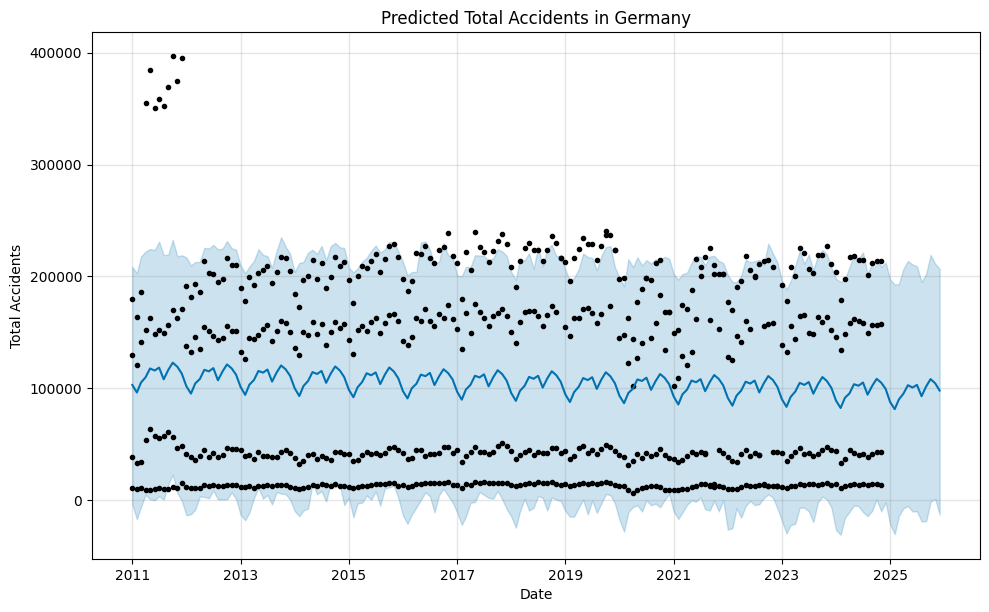

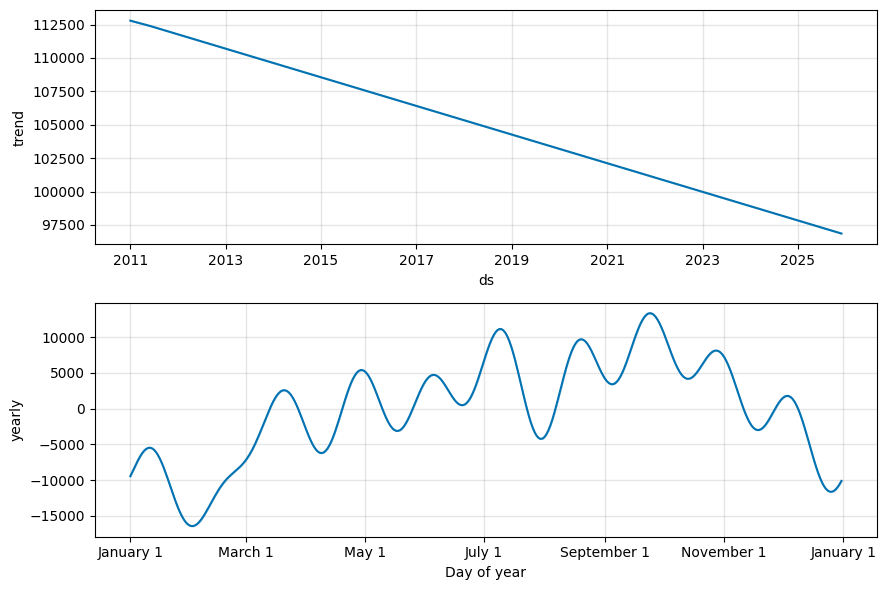

Predikcija za 2025. je eksportovana u 'forecast_2025.csv'


In [6]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
df = pd.read_excel('file/New_table.xlsx', sheet_name='Sheet1')

# 2️⃣ Standardize column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower()
print("Columns in dataset:", df.columns)

# 3️⃣ Ensure we have 'year' and 'months' columns
year_col = 'year'
month_col = 'months'  # your Excel column
accidents_col = 'total accidents'

# 4️⃣ Create 'date' column
# If month names are English
try:
    df['date'] = pd.to_datetime(df[year_col].astype(str) + '-' + df[month_col] + '-01')
except:
    # If month is numeric
    df['date'] = pd.to_datetime(df[[year_col, month_col]].assign(day=1))

# 5️⃣ Add quarter column
def get_quarter(month):
    if isinstance(month, str):
        if month in ['January','February','March']: return 'Q1'
        elif month in ['April','May','June']: return 'Q2'
        elif month in ['July','August','September']: return 'Q3'
        else: return 'Q4'
    else:  # numeric month
        if month in [1,2,3]: return 'Q1'
        elif month in [4,5,6]: return 'Q2'
        elif month in [7,8,9]: return 'Q3'
        else: return 'Q4'

df['Quarter'] = df[month_col].apply(get_quarter)

# 6️⃣ Prepare DataFrame for Prophet
prophet_df = df[['date', accidents_col]].rename(columns={'date': 'ds', accidents_col: 'y'})

# 7️⃣ Initialize Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_df)

# 8️⃣ Create future dataframe for 12 months (2025)
future = model.make_future_dataframe(periods=12, freq='M')

# 9️⃣ Make prediction
forecast = model.predict(future)

# 1️⃣0️⃣ Plot forecast
fig1 = model.plot(forecast)
plt.title("Predicted Total Accidents in Germany")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.show()

# 1️⃣1️⃣ Plot components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

# 1️⃣2️⃣ Export forecast to CSV
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_2025.csv', index=False)
print("Predikcija za 2025. je eksportovana u 'forecast_2025.csv'")

# 1️⃣3️⃣ Optional evaluation (when real 2025 data is available)
# df_2025 = pd.read_csv('data/processed/accidents_2025.csv')
# y_true = df_2025['Total Accidents']
# y_pred = forecast['yhat'][-12:]
# mae = mean_absolute_error(y_true, y_pred)
# rmse = mean_squared_error(y_true, y_pred, squared=False)
# print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
